In [2]:
# Data handling
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image

# Preprocessing
from sklearn.model_selection import train_test_split as tts

# Torch
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from torchinfo import summary
from torchvision.models import vit_b_16, ViT_B_16_Weights

# Metrics
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix

# os
import os

# Path
from pathlib import Path

# random
import random

# OrderedDict
from collections import OrderedDict

# tqdm
from tqdm.auto import tqdm

# warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
IMAGE_PATH = Path("Pharmaceutical and Biomedical Waste (PBW)")
IMAGE_PATH_LIST = list(IMAGE_PATH.glob("*/*/*.jpg"))
print(f'Total Images = {len(IMAGE_PATH_LIST)}')

Total Images = 6586


In [4]:
from pathlib import Path
import os

# Set image path (relative to your project folder)
IMAGE_PATH = Path("Pharmaceutical and Biomedical Waste (PBW)")

# Get class folders (each subdirectory is a class)
CLASSES = sorted(os.listdir(IMAGE_PATH))

print(f"Total Classes = {len(CLASSES)}:\n")

# Count and print image count per class
for label in CLASSES:
    label_path = IMAGE_PATH / label
    total_images_class = list(label_path.glob("*/*.jpg"))  # search one level deeper
    print(f'* {label}: {len(total_images_class)} images')



Total Classes = 12:

* (BT) Body Tissue or Organ: 515 images
* (GE) Glass equipment-packaging 551: 551 images
* (ME) Metal equipment -packaging: 500 images
* (OW) Organic wastes: 585 images
* (PE) Plastic equipment-packaging: 558 images
* (PP) Paper equipment-packaging: 513 images
* (SN) Syringe needles: 595 images
* Gauze: 567 images
* Gloves: 543 images
* Mask: 529 images
* Syringe: 569 images
* Tweezers: 561 images


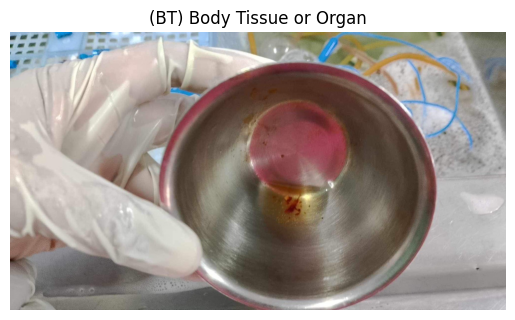

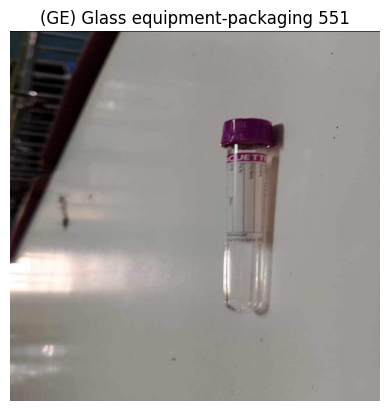

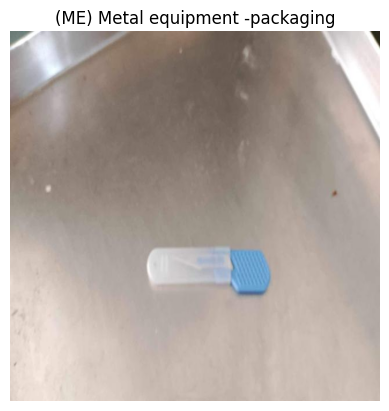

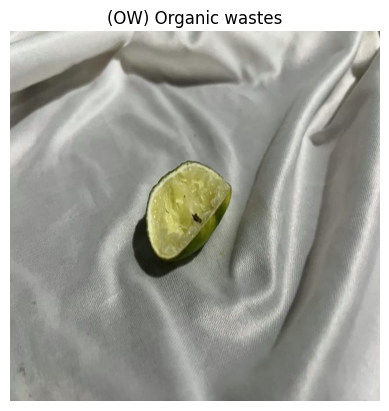

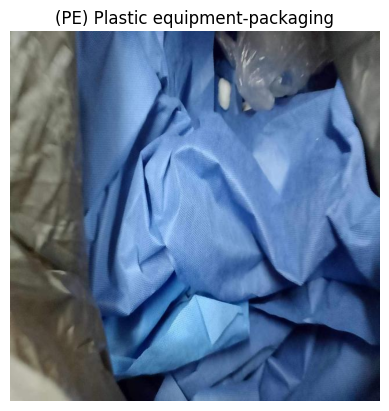

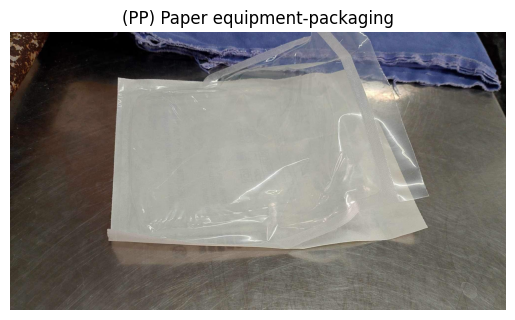

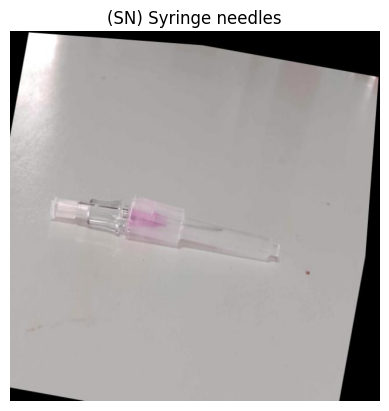

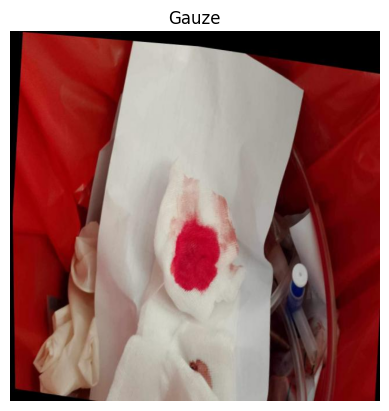

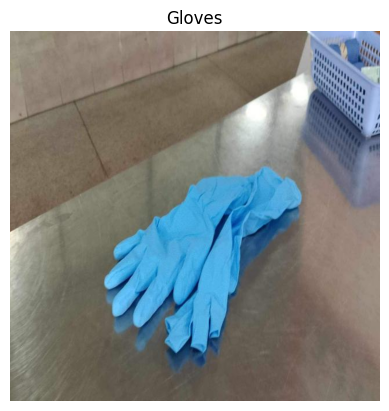

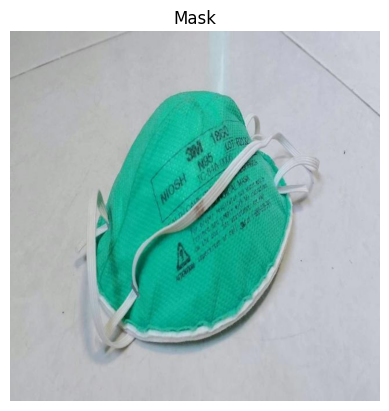

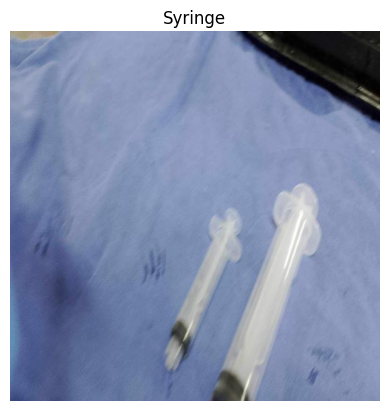

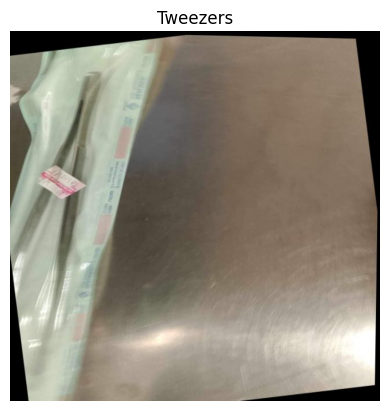

In [5]:
from PIL import Image
import matplotlib.pyplot as plt

# Show one sample image per class
for label in CLASSES:
    sample_image_path = next((IMAGE_PATH / label).glob("*/*.jpg"))
    img = Image.open(sample_image_path)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')
    plt.show()


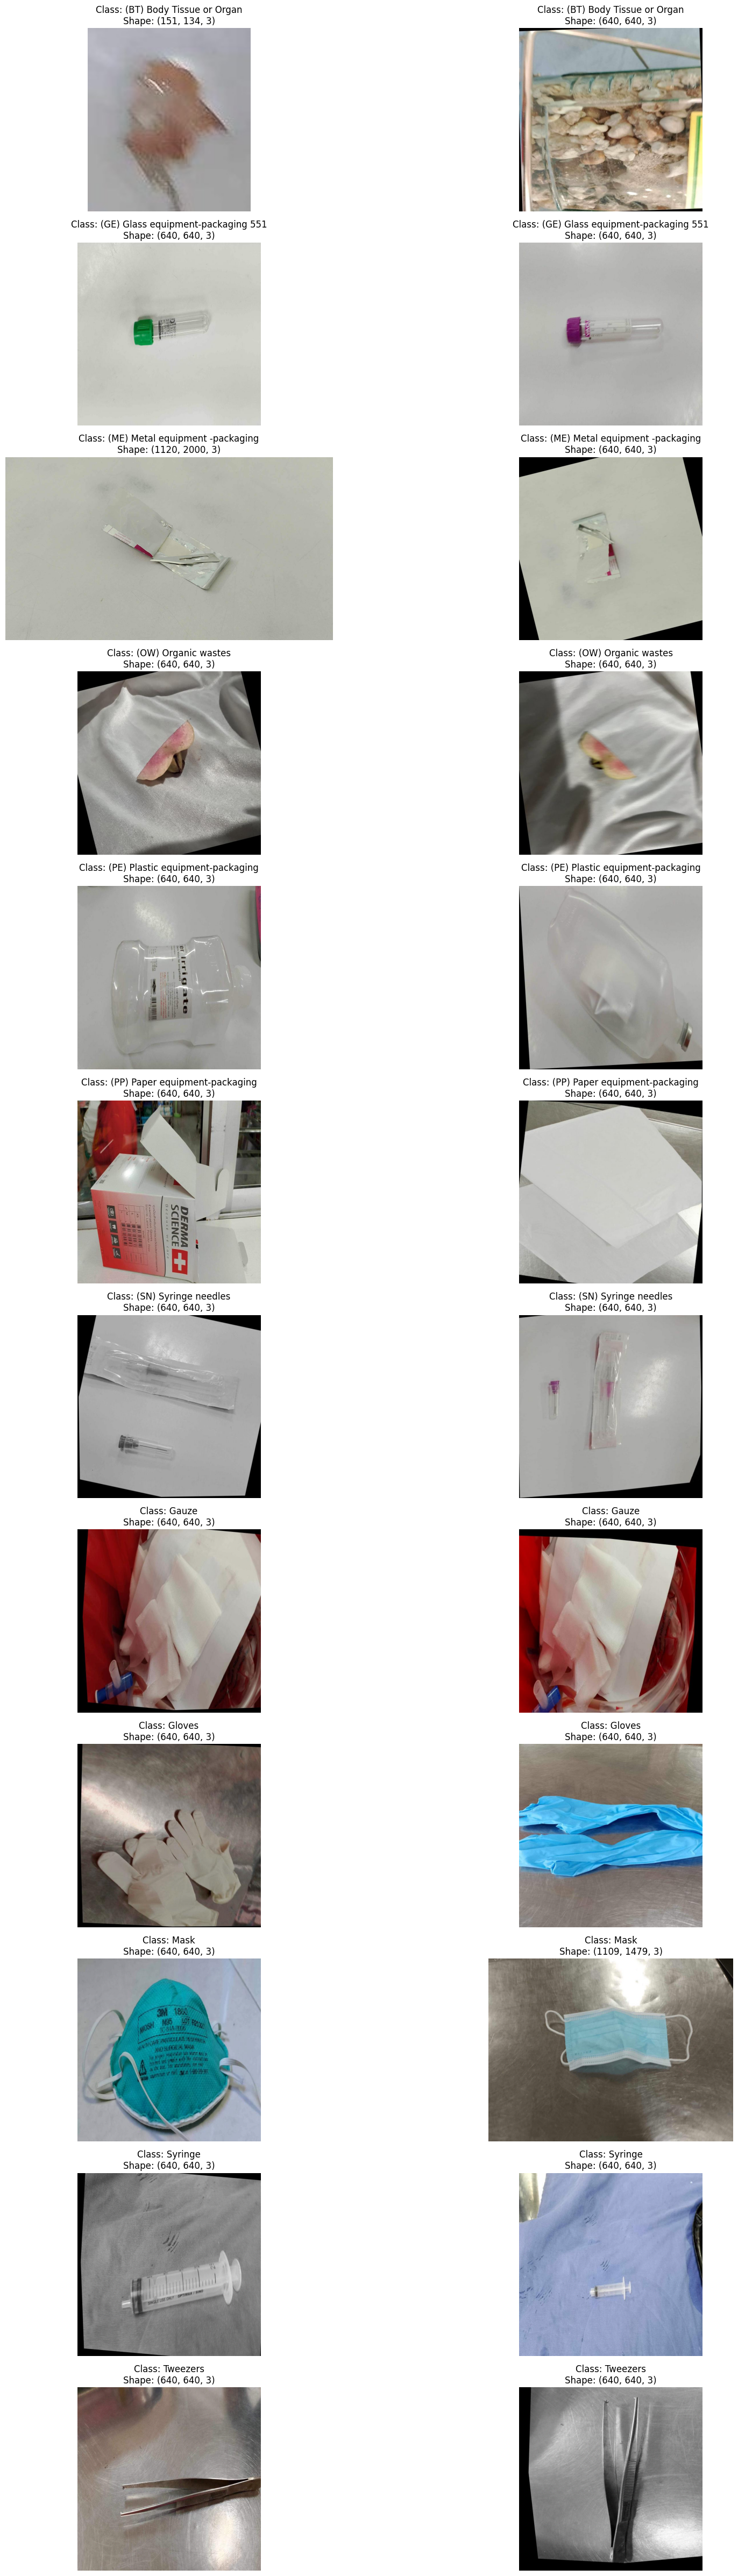

In [6]:
# Set image path
IMAGE_PATH = Path("Pharmaceutical and Biomedical Waste (PBW)")

# Get all class folders
CLASSES = sorted([f.name for f in IMAGE_PATH.glob("*") if f.is_dir()])

# Number of images to show per class
NUM_IMAGES = 2

# Setup figure
fig, ax = plt.subplots(nrows=len(CLASSES), ncols=NUM_IMAGES, figsize=(20, 4 * len(CLASSES)))

for row, label in enumerate(CLASSES):
    # Get all image paths inside class folders (Train and Test)
    image_paths = list((IMAGE_PATH / label).glob("*/*.jpg"))

    if len(image_paths) == 0:
        print(f"[WARNING] No images found for class: {label}")
        continue

    # Select random images
    selected_images = random.choices(image_paths, k=NUM_IMAGES)

    for col, img_path in enumerate(selected_images):
        try:
            # Load image with PIL (handles Unicode paths)
            img = Image.open(img_path).convert("RGB")
            img_np = np.array(img)

            ax[row, col].imshow(img_np)
            ax[row, col].axis('off')
            ax[row, col].set_title(f'Class: {label}\nShape: {img_np.shape}')
        
        except Exception as e:
            print(f"[ERROR] Could not load image: {img_path} | {e}")
            ax[row, col].axis('off')
            ax[row, col].set_title(f'Error loading image')

plt.tight_layout()
plt.show()

In [7]:
from pathlib import Path

# Set dataset base path
IMAGE_PATH = Path("Pharmaceutical and Biomedical Waste (PBW)")
IMAGE_PATH_LIST = list(IMAGE_PATH.rglob("*.jpg"))

# Init lists
images_path_train = []
labels_train = []
images_path_test = []
labels_test = []

# Sort images into train/test sets
for img_path in IMAGE_PATH_LIST:
    try:
        split_type = img_path.parent.name.strip()            # Train images / Test images
        class_label = img_path.parents[1].name.strip()       # (BT) Body Tissue or Organ, etc.

        if split_type == "Train images":
            images_path_train.append(img_path)
            labels_train.append(class_label)
        elif split_type == "Test images":
            images_path_test.append(img_path)
            labels_test.append(class_label)

    except Exception as e:
        print(f"[ERROR] {img_path} - {e}")

# Output results
print(f"✅ Train Images: {len(images_path_train)}")
print(f"✅ Test Images: {len(images_path_test)}")
print(f"🎓 Classes in Train: {set(labels_train)}")
print(f"🧪 Classes in Test: {set(labels_test)}")


✅ Train Images: 5259
✅ Test Images: 1327
🎓 Classes in Train: {'(SN) Syringe needles', '(PP) Paper equipment-packaging', '(OW) Organic wastes', 'Tweezers', '(BT) Body Tissue or Organ', '(ME) Metal equipment -packaging', 'Gloves', 'Mask', '(GE) Glass equipment-packaging 551', '(PE) Plastic equipment-packaging', 'Gauze', 'Syringe'}
🧪 Classes in Test: {'(SN) Syringe needles', '(PP) Paper equipment-packaging', '(OW) Organic wastes', 'Tweezers', '(BT) Body Tissue or Organ', '(ME) Metal equipment -packaging', 'Gloves', 'Mask', '(GE) Glass equipment-packaging 551', '(PE) Plastic equipment-packaging', 'Gauze', 'Syringe'}


In [8]:
from pathlib import Path

IMAGE_PATH = Path("Pharmaceutical and Biomedical Waste (PBW)")
IMAGE_PATH_LIST = list(IMAGE_PATH.rglob("*.*"))

print("All files found:")
for path in IMAGE_PATH_LIST:
    print(path)


All files found:
Pharmaceutical and Biomedical Waste (PBW)\(BT) Body Tissue or Organ\Test images\LINE_ALBUM_191266_๒๓๑๒๑๙_100.jpg
Pharmaceutical and Biomedical Waste (PBW)\(BT) Body Tissue or Organ\Test images\LINE_ALBUM_191266_๒๓๑๒๑๙_101.jpg
Pharmaceutical and Biomedical Waste (PBW)\(BT) Body Tissue or Organ\Test images\LINE_ALBUM_191266_๒๓๑๒๑๙_102.jpg
Pharmaceutical and Biomedical Waste (PBW)\(BT) Body Tissue or Organ\Test images\LINE_ALBUM_191266_๒๓๑๒๑๙_103.jpg
Pharmaceutical and Biomedical Waste (PBW)\(BT) Body Tissue or Organ\Test images\LINE_ALBUM_191266_๒๓๑๒๑๙_104.jpg
Pharmaceutical and Biomedical Waste (PBW)\(BT) Body Tissue or Organ\Test images\LINE_ALBUM_191266_๒๓๑๒๑๙_105.jpg
Pharmaceutical and Biomedical Waste (PBW)\(BT) Body Tissue or Organ\Test images\LINE_ALBUM_191266_๒๓๑๒๑๙_106.jpg
Pharmaceutical and Biomedical Waste (PBW)\(BT) Body Tissue or Organ\Test images\LINE_ALBUM_191266_๒๓๑๒๑๙_107.jpg
Pharmaceutical and Biomedical Waste (PBW)\(BT) Body Tissue or Organ\Test images

In [9]:
from pathlib import Path
import pandas as pd

# Root folder
ROOT = Path("Pharmaceutical and Biomedical Waste (PBW)")

# Prepare lists to collect paths and labels
images_path_train = []
labels_train = []

# Loop through all class folders
for class_folder in ROOT.iterdir():
    if class_folder.is_dir():
        train_dir = class_folder / 'Train images'
        if train_dir.exists():
            for img_path in train_dir.glob("*.jpg"):
                images_path_train.append(img_path)
                labels_train.append(class_folder.name)  # label is folder name like (BT)...

# Create dataframe
data_train = pd.DataFrame({
    'Image': [str(p) for p in images_path_train],
    'Label': labels_train
})

# Display some results
print(f"Total training images: {len(data_train)}")
data_train.head()


Total training images: 5259


Image  \
0  Pharmaceutical and Biomedical Waste (PBW)\(BT)...   
1  Pharmaceutical and Biomedical Waste (PBW)\(BT)...   
2  Pharmaceutical and Biomedical Waste (PBW)\(BT)...   
3  Pharmaceutical and Biomedical Waste (PBW)\(BT)...   
4  Pharmaceutical and Biomedical Waste (PBW)\(BT)...   

                       Label  
0  (BT) Body Tissue or Organ  
1  (BT) Body Tissue or Organ  
2  (BT) Body Tissue or Organ  
3  (BT) Body Tissue or Organ  
4  (BT) Body Tissue or Organ

In [10]:
from pathlib import Path
import pandas as pd

# Root folder
ROOT = Path("Pharmaceutical and Biomedical Waste (PBW)")

# Prepare lists to collect test paths and labels
images_path_test = []
labels_test = []

# Loop through all class folders
for class_folder in ROOT.iterdir():
    if class_folder.is_dir():
        test_dir = class_folder / 'Test images'
        if test_dir.exists():
            for img_path in test_dir.glob("*.jpg"):
                images_path_test.append(img_path)
                labels_test.append(class_folder.name)  # label is folder name like (BT)...

# Create dataframe
data_test = pd.DataFrame({
    'Image': [str(p) for p in images_path_test],
    'Label': labels_test
})

# Display some results
print(f"Total test images: {len(data_test)}")
data_test.head()


Total test images: 1327


Image  \
0  Pharmaceutical and Biomedical Waste (PBW)\(BT)...   
1  Pharmaceutical and Biomedical Waste (PBW)\(BT)...   
2  Pharmaceutical and Biomedical Waste (PBW)\(BT)...   
3  Pharmaceutical and Biomedical Waste (PBW)\(BT)...   
4  Pharmaceutical and Biomedical Waste (PBW)\(BT)...   

                       Label  
0  (BT) Body Tissue or Organ  
1  (BT) Body Tissue or Organ  
2  (BT) Body Tissue or Organ  
3  (BT) Body Tissue or Organ  
4  (BT) Body Tissue or Organ

In [11]:
from sklearn.model_selection import train_test_split as tts

SEED = 42

data_training, data_validation = tts(
    data_train,
    test_size=0.3,
    random_state=SEED,
    stratify=data_train['Label'],  # Ensures class balance
    shuffle=True
)

print("Training set shape:", data_training.shape)
print("Validation set shape:", data_validation.shape)


Training set shape: (3681, 2)
Validation set shape: (1578, 2)


In [12]:
# We created a dictionary to map the image tags.
CLASSES = sorted(data_train['Label'].unique())  # get sorted unique class names
label2id = dict(zip(CLASSES, range(len(CLASSES))))
print("\nLabel to ID mapping:\n", label2id)

# Map labels to numeric IDs
data_training['Label_ID'] = data_training['Label'].map(label2id)
data_validation['Label_ID'] = data_validation['Label'].map(label2id)
data_test['Label_ID'] = data_test['Label'].map(label2id)

# Preview samples
print("\nTraining Sample:\n", data_training.head())
print("\nValidation Sample:\n", data_validation.head())
print("\nTest Sample:\n", data_test.head())



Label to ID mapping:
 {'(BT) Body Tissue or Organ': 0, '(GE) Glass equipment-packaging 551': 1, '(ME) Metal equipment -packaging': 2, '(OW) Organic wastes': 3, '(PE) Plastic equipment-packaging': 4, '(PP) Paper equipment-packaging': 5, '(SN) Syringe needles': 6, 'Gauze': 7, 'Gloves': 8, 'Mask': 9, 'Syringe': 10, 'Tweezers': 11}

Training Sample:
                                                   Image  \
3858  Pharmaceutical and Biomedical Waste (PBW)\Glov...   
104   Pharmaceutical and Biomedical Waste (PBW)\(BT)...   
5234  Pharmaceutical and Biomedical Waste (PBW)\Twee...   
3990  Pharmaceutical and Biomedical Waste (PBW)\Mask...   
4826  Pharmaceutical and Biomedical Waste (PBW)\Twee...   

                          Label  Label_ID  
3858                     Gloves         8  
104   (BT) Body Tissue or Organ         0  
5234                   Tweezers        11  
3990                       Mask         9  
4826                   Tweezers        11  

Validation Sample:
           

In [13]:
from torch.utils.data import Dataset
from PIL import Image
import pandas as pd

class CustomImageDataset(Dataset):
    def __init__(self, data: pd.DataFrame, label_map: dict, transforms=None):
        self.data = data.reset_index(drop=True)  # Ensure indices are clean
        self.label_map = label_map
        self.transforms = transforms

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Get image path and label
        image_path = self.data.loc[idx, 'Image']
        label_name = self.data.loc[idx, 'Label']
        label = self.label_map[label_name]

        # Load and transform image
        image = Image.open(image_path).convert("RGB")
        if self.transforms:
            image = self.transforms(image)

        return image, label


In [14]:
from torchvision.models import ViT_B_16_Weights

# Load default weights
weights = ViT_B_16_Weights.DEFAULT

# Get transforms recommended for those weights
image_transforms = weights.transforms()

# Optional: View the transformations
print(image_transforms)


ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)


In [15]:
# Initialize training and validation datasets
train_dataset = CustomImageDataset(data_training, label2id, image_transforms)
val_dataset = CustomImageDataset(data_validation, label2id, image_transforms)


In [16]:
from torch.utils.data import DataLoader
import os

# Define batch size and number of workers
BATCH_SIZE = 16
NUM_WORKERS = 0  # Use 0 on Windows or inside Jupyter notebooks
# NUM_WORKERS = os.cpu_count()

# Create DataLoaders for training and validation datasets
train_dataloader = DataLoader(
    dataset=train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=NUM_WORKERS
)

val_dataloader = DataLoader(
    dataset=val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,   # Use False for validation to maintain order
    num_workers=NUM_WORKERS
)


In [17]:
# We visualize the dimensions of a batch.
batch_images, batch_labels = next(iter(train_dataloader))

print("Batch image tensor shape:", batch_images.shape)   # Should be [BATCH_SIZE, 3, 224, 224]
print("Batch label tensor shape:", batch_labels.shape)   # Should be [BATCH_SIZE]


Batch image tensor shape: torch.Size([16, 3, 224, 224])
Batch label tensor shape: torch.Size([16])


In [18]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", DEVICE)


Using device: cpu


In [19]:
from torchvision.models import resnet18, ResNet18_Weights

# Load pretrained weights
weights = ResNet18_Weights.DEFAULT

# Load model
model = resnet18(weights=weights)

# Modify final layer for your number of classes
num_classes = len(label2id)
model.fc = torch.nn.Linear(in_features=model.fc.in_features, out_features=num_classes)

model = model.to(DEVICE)



In [20]:
from torchinfo import summary
# We visualize the architecture of our model.
summary(
    model=model,
    input_size=[32, 3, 224, 224],  # [Batch size, Channels, Height, Width]
    col_width=15,
    col_names=["input_size", "output_size", "num_params", "trainable"],
    row_settings=["var_names"]
)


Layer (type (var_name))                  Input Shape     Output Shape    Param #         Trainable
ResNet (ResNet)                          [32, 3, 224, 224] [32, 12]        --              True
├─Conv2d (conv1)                         [32, 3, 224, 224] [32, 64, 112, 112] 9,408           True
├─BatchNorm2d (bn1)                      [32, 64, 112, 112] [32, 64, 112, 112] 128             True
├─ReLU (relu)                            [32, 64, 112, 112] [32, 64, 112, 112] --              --
├─MaxPool2d (maxpool)                    [32, 64, 112, 112] [32, 64, 56, 56] --              --
├─Sequential (layer1)                    [32, 64, 56, 56] [32, 64, 56, 56] --              True
│    └─BasicBlock (0)                    [32, 64, 56, 56] [32, 64, 56, 56] --              True
│    │    └─Conv2d (conv1)               [32, 64, 56, 56] [32, 64, 56, 56] 36,864          True
│    │    └─BatchNorm2d (bn1)            [32, 64, 56, 56] [32, 64, 56, 56] 128             True
│    │    └─ReLU (relu)     

In [21]:
# Freeze all layers in the feature extractor
for param in model.parameters():
    param.requires_grad = False

# Unfreeze the classifier (final FC layer) so it can be fine-tuned
for param in model.fc.parameters():
    param.requires_grad = True



In [22]:
# We see if the extractor layers freeze.
summary(model = model, input_size = [16, 3, 224, 224], col_width = 15, 
        col_names = ['input_size', 'output_size', 'num_params', 'trainable'], 
        row_settings = ['var_names'])

Layer (type (var_name))                  Input Shape     Output Shape    Param #         Trainable
ResNet (ResNet)                          [16, 3, 224, 224] [16, 12]        --              Partial
├─Conv2d (conv1)                         [16, 3, 224, 224] [16, 64, 112, 112] (9,408)         False
├─BatchNorm2d (bn1)                      [16, 64, 112, 112] [16, 64, 112, 112] (128)           False
├─ReLU (relu)                            [16, 64, 112, 112] [16, 64, 112, 112] --              --
├─MaxPool2d (maxpool)                    [16, 64, 112, 112] [16, 64, 56, 56] --              --
├─Sequential (layer1)                    [16, 64, 56, 56] [16, 64, 56, 56] --              False
│    └─BasicBlock (0)                    [16, 64, 56, 56] [16, 64, 56, 56] --              False
│    │    └─Conv2d (conv1)               [16, 64, 56, 56] [16, 64, 56, 56] (36,864)        False
│    │    └─BatchNorm2d (bn1)            [16, 64, 56, 56] [16, 64, 56, 56] (128)           False
│    │    └─ReLU (r

In [23]:
# We modify the output layer.
output_shape = len(CLASSES)

model.heads = nn.Sequential(OrderedDict([('head', nn.Linear(in_features = 768, out_features = output_shape))]))

In [24]:
# We view one last time to check if they were modified correctly.
summary(model = model, input_size = [16, 3, 224, 224], col_width = 15, 
        col_names = ['input_size', 'output_size', 'num_params', 'trainable'], 
        row_settings = ['var_names'])

Layer (type (var_name))                  Input Shape     Output Shape    Param #         Trainable
ResNet (ResNet)                          [16, 3, 224, 224] [16, 12]        9,228           Partial
├─Conv2d (conv1)                         [16, 3, 224, 224] [16, 64, 112, 112] (9,408)         False
├─BatchNorm2d (bn1)                      [16, 64, 112, 112] [16, 64, 112, 112] (128)           False
├─ReLU (relu)                            [16, 64, 112, 112] [16, 64, 112, 112] --              --
├─MaxPool2d (maxpool)                    [16, 64, 112, 112] [16, 64, 56, 56] --              --
├─Sequential (layer1)                    [16, 64, 56, 56] [16, 64, 56, 56] --              False
│    └─BasicBlock (0)                    [16, 64, 56, 56] [16, 64, 56, 56] --              False
│    │    └─Conv2d (conv1)               [16, 64, 56, 56] [16, 64, 56, 56] (36,864)        False
│    │    └─BatchNorm2d (bn1)            [16, 64, 56, 56] [16, 64, 56, 56] (128)           False
│    │    └─ReLU (r

In [25]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.01, weight_decay = 0.0001)

In [26]:
import torch

class EarlyStopping:
    def __init__(self, patience: int = 10, delta: float = 0.0001, path: str = "best_model.pth"):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
            path (str): Path to save the best model.
        """
        self.patience = patience
        self.delta = delta
        self.path = path
        self.counter = 0
        self.best_score = None
        self.early_stop = False

    def __call__(self, val_loss, model):
        # First epoch
        if self.best_score is None:
            self.best_score = val_loss
            self.save_checkpoint(model)

        # No improvement
        elif val_loss > self.best_score - self.delta:
            self.counter += 1
            print(f"EarlyStopping counter: {self.counter} out of {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True

        # Improvement found
        else:
            self.best_score = val_loss
            self.save_checkpoint(model)
            self.counter = 0

    def save_checkpoint(self, model):
        torch.save(model.state_dict(), self.path)
        print(f"✅ Model saved as {self.path}")


In [27]:
early_stopping = EarlyStopping(patience = 20, delta = 0.)

In [28]:
def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer):
    
    model.train()  # Set model to training mode
    
    train_loss = 0
    train_accuracy = 0
    
    for batch, (X, y) in enumerate(dataloader):
        # Move data to device
        X = X.to(DEVICE, dtype=torch.float32)
        y = y.to(DEVICE, dtype=torch.long)

        # Forward pass
        optimizer.zero_grad()
        y_pred_logits = model(X)
        loss = loss_fn(y_pred_logits, y)
        train_loss += loss.item()

        # Backward pass
        loss.backward()
        optimizer.step()

        # Calculate batch accuracy
        y_pred_probs = torch.softmax(y_pred_logits, dim=1)
        y_pred_classes = torch.argmax(y_pred_probs, dim=1)
        
        # Balanced Accuracy for imbalanced classes
        train_accuracy += balanced_accuracy_score(
            y.cpu().numpy(), 
            y_pred_classes.detach().cpu().numpy()
        )

    # Average loss and accuracy over all batches
    train_loss /= len(dataloader)
    train_accuracy /= len(dataloader)
    
    return train_loss, train_accuracy


In [29]:
def val_step(model: torch.nn.Module, 
             dataloader: torch.utils.data.DataLoader, 
             loss_fn: torch.nn.Module):
    
    model.eval()  # Set model to evaluation mode
    
    val_loss = 0
    val_accuracy = 0
    
    with torch.inference_mode():  # No gradients for validation
        for batch, (X, y) in enumerate(dataloader):
            X = X.to(DEVICE, dtype=torch.float32)
            y = y.to(DEVICE, dtype=torch.long)

            # Forward pass
            y_pred_logits = model(X)
            loss = loss_fn(y_pred_logits, y)
            val_loss += loss.item()

            # Prediction
            y_pred_probs = torch.softmax(y_pred_logits, dim=1)
            y_pred_classes = torch.argmax(y_pred_probs, dim=1)

            # Balanced accuracy
            val_accuracy += balanced_accuracy_score(
                y.cpu().numpy(),
                y_pred_classes.detach().cpu().numpy()
            )

    # Average across all batches
    val_loss /= len(dataloader)
    val_accuracy /= len(dataloader)

    return val_loss, val_accuracy


In [30]:
def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          val_dataloader: torch.utils.data.DataLoader, 
          loss_fn: torch.nn.Module, 
          optimizer: torch.optim.Optimizer, 
          early_stopping, 
          epochs: int = 10):
    
    results = {
        'train_loss': [],
        'train_accuracy': [],
        'val_loss': [],
        'val_accuracy': []
    }

    for epoch in tqdm(range(epochs)):
        # Training step
        train_loss, train_accuracy = train_step(
            model=model, 
            dataloader=train_dataloader, 
            loss_fn=loss_fn, 
            optimizer=optimizer
        )

        # Validation step
        val_loss, val_accuracy = val_step(
            model=model, 
            dataloader=val_dataloader, 
            loss_fn=loss_fn
        )

        # Print metrics
        print(f"Epoch {epoch+1} | "
              f"Train Loss: {train_loss:.4f} | Train Acc: {train_accuracy:.4f} | "
              f"Val Loss: {val_loss:.4f} | Val Acc: {val_accuracy:.4f}")

        # Apply early stopping
        early_stopping(val_loss, model)
        if early_stopping.early_stop:
            print("Early stopping triggered. Training halted.")
            break

        # Save results
        results['train_loss'].append(train_loss)
        results['train_accuracy'].append(train_accuracy)
        results['val_loss'].append(val_loss)
        results['val_accuracy'].append(val_accuracy)

    return results


In [31]:
# 0) (Re)define EarlyStopping – paste the new class here exactly
class EarlyStopping:
    def __init__(self, patience=10, min_delta=0.0, save_path="best_model.pth", verbose=True):
        self.patience = patience
        self.min_delta = min_delta
        self.save_path = save_path
        self.verbose = verbose
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
    def __call__(self, val_loss, model):
        if self.best_loss is None:
            self.best_loss = val_loss
            torch.save(model.state_dict(), self.save_path)
            if self.verbose: print(f"[EarlyStopping] Init best_loss={val_loss:.6f} → saved.")
            return
        if val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
            torch.save(model.state_dict(), self.save_path)
            if self.verbose: print(f"[EarlyStopping] Improved → {val_loss:.6f}. Saved.")
        else:
            self.counter += 1
            if self.verbose: print(f"[EarlyStopping] No improvement ({self.counter}/{self.patience}).")
            if self.counter >= self.patience:
                self.early_stop = True
                if self.verbose: print("[EarlyStopping] Patience reached.")

# 1) Re-create early_stopping *every time before training*
early_stopping = EarlyStopping(patience=10, min_delta=1e-4, save_path="best_model.pth", verbose=True)

# 2) Reproducibility
EPOCHS = 50
torch.cuda.manual_seed(SEED)
torch.manual_seed(SEED)

# 3) Train (ensure your train() logs metrics BEFORE early_stopping, as you showed)
RESULTS = train(
    model.to(device=DEVICE),
    train_dataloader,
    val_dataloader,
    loss_fn,
    optimizer,
    early_stopping,
    EPOCHS
)

# 4) Load best weights for eval/inference
model.load_state_dict(torch.load("best_model.pth", map_location=DEVICE))
model.to(DEVICE).eval()


  0%|          | 0/50 [00:00<?, ?it/s]

KeyboardInterrupt: 

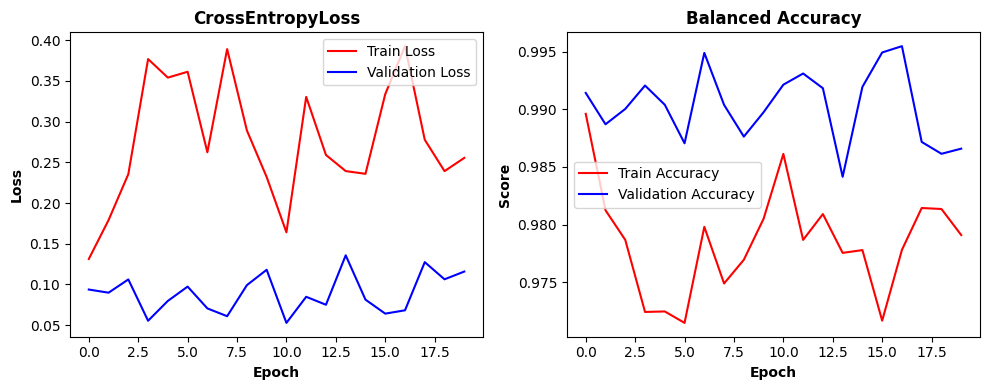

In [ ]:
# We define a function to plot the evolution of the loss and the metric.
def metric_and_loss_plot(results: dict):
    training_loss = results['train_loss']
    training_accuracy = results['train_accuracy']
    
    valid_loss = results['val_loss']
    valid_accuracy = results['val_accuracy']
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    ax = ax.flat
    
    # Loss plot
    ax[0].plot(training_loss, color="red", label="Train Loss")
    ax[0].plot(valid_loss, color="blue", label="Validation Loss")
    ax[0].set_title("CrossEntropyLoss", fontsize=12, fontweight="bold", color="black")
    ax[0].set_xlabel("Epoch", fontsize=10, fontweight="bold", color="black")
    ax[0].set_ylabel("Loss", fontsize=10, fontweight="bold", color="black")
    ax[0].legend()
    
    # Accuracy plot
    ax[1].plot(training_accuracy, color="red", label="Train Accuracy")
    ax[1].plot(valid_accuracy, color="blue", label="Validation Accuracy")
    ax[1].set_title("Balanced Accuracy", fontsize=12, fontweight="bold", color="black")
    ax[1].set_xlabel("Epoch", fontsize=10, fontweight="bold", color="black")
    ax[1].set_ylabel("Score", fontsize=10, fontweight="bold", color="black")
    ax[1].legend()
    
    fig.tight_layout()
    plt.show()

# Call the function with your results
metric_and_loss_plot(RESULTS)


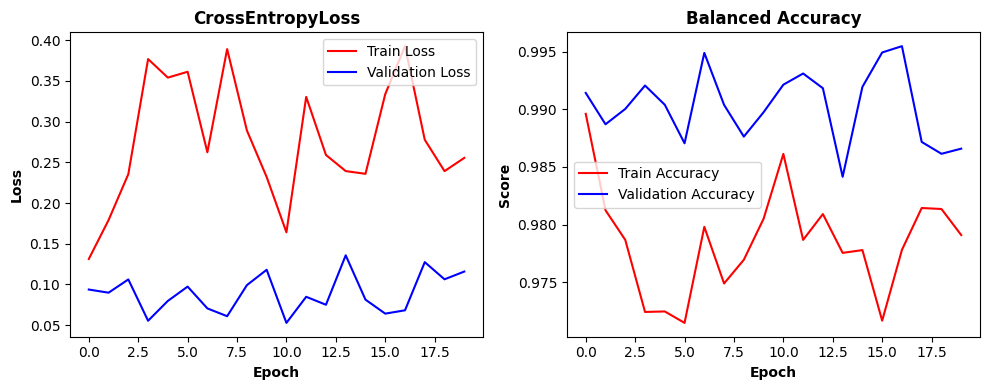

In [ ]:
metric_and_loss_plot(RESULTS)

In [ ]:
from collections import OrderedDict
from tqdm.auto import tqdm
import torch
import torch.nn as nn
from torchvision.models import vit_b_16

def predictions(test_dataloader: torch.utils.data.DataLoader):
    """
    Loads the best saved model (best_model.pth), runs inference on test_dataloader,
    and returns predicted class indices for each sample.
    """
    
    # 1) Load checkpoint
    checkpoint = torch.load("best_model.pth", map_location=DEVICE)
    
    # 2) Recreate the model architecture
    loaded_model = vit_b_16()
    loaded_model.heads = nn.Sequential(OrderedDict([
        ('head', nn.Linear(in_features=768, out_features=output_shape))
    ]))
    
    # 3) Load trained weights
    loaded_model.load_state_dict(checkpoint)
    loaded_model.to(device=DEVICE)
    loaded_model.eval()
    
    # 4) Store predictions
    y_pred_test = []
    
    with torch.inference_mode():
        for X, _ in tqdm(test_dataloader, desc="Predicting"):
            X = X.to(device=DEVICE, dtype=torch.float32)
            y_pred_logit = loaded_model(X)
            y_pred_prob = y_pred_logit.softmax(dim=1)
            y_pred_class = y_pred_prob.argmax(dim=1)
            y_pred_test.append(y_pred_class.detach().cpu())
    
    # 5) Concatenate predictions into a single tensor
    y_pred_test = torch.cat(y_pred_test)
    
    return y_pred_test


In [ ]:
import pandas as pd
from torch.utils.data import DataLoader
from pathlib import Path

# 0) data_testing already built as: [(path, label), ...]
# If not, build it via rglob("Test images") as we did earlier.

# 1) Convert to DataFrame with expected columns
test_df = pd.DataFrame(data_testing, columns=["image_path", "label"])

# (optional) ensure only labels present in label2id are kept
missing = sorted(set(test_df["label"]) - set(label2id.keys()))
if missing:
    print("[WARN] Labels not in label2id (rows will be dropped):", missing)
    test_df = test_df[~test_df["label"].isin(missing)]

# 2) Create Dataset (expects a DataFrame)
test_dataset = CustomImageDataset(
    test_df.reset_index(drop=True),
    label2id,
    image_transforms
)

# 3) Create DataLoader
test_dataloader = DataLoader(
    dataset=test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=NUM_WORKERS
)

print("[OK] test_dataloader ready with", len(test_dataset), "samples across",
      test_df['label'].nunique(), "classes.")


[OK] test_dataloader ready with 1327 samples across 12 classes.


In [ ]:
import os, torch, torch.nn as nn
from tqdm.auto import tqdm
from torchvision.models import resnet18, resnet34, resnet50

NUM_CLASSES = len(label2id)

# ---- helpers ----
def _extract_state_dict(ckpt):
    # unwrap common formats
    if isinstance(ckpt, dict):
        # raw state_dict?
        if ckpt and all(isinstance(v, torch.Tensor) for v in ckpt.values()):
            return ckpt
        for k in ("model_state_dict","state_dict","model","net"):
            if k in ckpt and isinstance(ckpt[k], dict):
                inner = ckpt[k]
                if inner and all(isinstance(v, torch.Tensor) for v in inner.values()):
                    return inner
                for kk in ("model_state_dict","state_dict"):
                    if kk in inner and isinstance(inner[kk], dict):
                        return inner[kk]
    return ckpt

def _strip_module(sd):
    return { (k[7:] if k.startswith("module.") else k): v for k,v in sd.items() }

def _build_resnet_from_sd(sd, num_classes):
    # infer fc in_features; 512 -> resnet18/34, 2048 -> resnet50
    in_feats = sd.get("fc.weight", torch.empty(0,512)).shape[1] if "fc.weight" in sd else 512
    if in_feats == 2048:
        m = resnet50(weights=None);  m.fc = nn.Linear(2048, num_classes)
    else:
        m = resnet34(weights=None);  m.fc = nn.Linear(512,  num_classes)  # swap to resnet18 if you trained 18
    return m

def predict_from_checkpoint(ckpt_path, test_dataloader, device):
    if not os.path.exists(ckpt_path):
        raise FileNotFoundError(f"Checkpoint not found: {os.path.abspath(ckpt_path)}")

    raw = torch.load(ckpt_path, map_location=device)
    sd  = _strip_module(_extract_state_dict(raw))
    if not isinstance(sd, dict) or not sd:
        raise RuntimeError("Invalid checkpoint: could not extract a state_dict.")

    model = _build_resnet_from_sd(sd, NUM_CLASSES)

    # strict first; if head differs, fall back to filtered non‑strict
    try:
        model.load_state_dict(sd, strict=True)
    except Exception:
        model_state = model.state_dict()
        filtered = {k:v for k,v in sd.items() if k in model_state}
        model.load_state_dict(filtered, strict=False)

    model.to(device).eval()

    preds = []
    with torch.inference_mode():
        for X, _ in tqdm(test_dataloader, desc="Predicting (ResNet)"):
            X = X.to(device, dtype=torch.float32)
            preds.append(model(X).softmax(1).argmax(1).cpu())
    return torch.cat(preds)


In [ ]:
# Fix column names to match CustomImageDataset expectations
rename_map = {}
if "Image" not in test_df.columns and "image_path" in test_df.columns:
    rename_map["image_path"] = "Image"
if "Label" not in test_df.columns and "label" in test_df.columns:
    rename_map["label"] = "Label"

if rename_map:
    test_df = test_df.rename(columns=rename_map)

print("Columns now:", list(test_df.columns))  # should include 'Image' and 'Label'


Columns now: ['Image', 'Label']


In [ ]:
test_dataset = CustomImageDataset(
    test_df.reset_index(drop=True),
    label2id,
    image_transforms
)

test_dataloader = DataLoader(
    dataset=test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=NUM_WORKERS
)


In [ ]:
y_pred_test = predict_from_checkpoint("best_model_resnet34_clean.pth", test_dataloader, DEVICE)
print("[OK] Predictions:", y_pred_test.shape)


Predicting (ResNet):   0%|          | 0/83 [00:00<?, ?it/s]

[OK] Predictions: torch.Size([1327])


In [ ]:
# We make the predictions.
y_pred_test = predictions(test_dataloader)

[warn] 96 weights not found in checkpoint (non-head). Example: ['layer1.2.bn1.bias', 'layer1.2.bn1.num_batches_tracked', 'layer1.2.bn1.running_mean', 'layer1.2.bn1.running_var', 'layer1.2.bn1.weight']


Predicting [resnet]:   0%|          | 0/83 [00:00<?, ?it/s]

                                    precision    recall  f1-score   support

         (BT) Body Tissue or Organ     0.0714    0.8558    0.1319       104
(GE) Glass equipment-packaging 551     0.0000    0.0000    0.0000       111
   (ME) Metal equipment -packaging     0.0000    0.0000    0.0000       100
               (OW) Organic wastes     0.0000    0.0000    0.0000       117
  (PE) Plastic equipment-packaging     0.0000    0.0000    0.0000       112
    (PP) Paper equipment-packaging     0.0247    0.0194    0.0217       103
              (SN) Syringe needles     0.0000    0.0000    0.0000       119
                             Gauze     0.0000    0.0000    0.0000       115
                            Gloves     0.0000    0.0000    0.0000       109
                              Mask     0.0000    0.0000    0.0000       110
                           Syringe     0.0000    0.0000    0.0000       114
                          Tweezers     0.0000    0.0000    0.0000       113

          

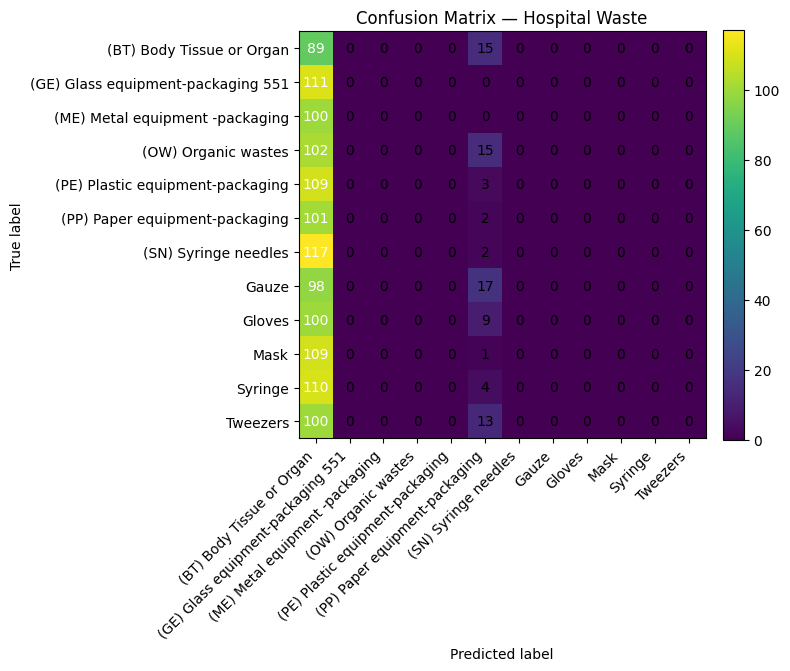

Saved: confusion_matrix_hospital_waste.png and test_predictions_hospital_waste.csv


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import torch

# --- 1) collect ground-truth labels from the loader ---
y_true = []
with torch.inference_mode():
    for _, y in test_dataloader:
        y_true.extend(y.cpu().tolist())
y_true = np.array(y_true)

# sanity
assert len(y_true) == len(y_pred_test), (len(y_true), len(y_pred_test))

# --- 2) id <-> label maps ---
id2label = {v: k for k, v in label2id.items()}
target_names = [id2label[i] for i in range(len(id2label))]

# --- 3) classification report ---
print(classification_report(y_true, y_pred_test.numpy(), target_names=target_names, digits=4))

# --- 4) confusion matrix (nice plot) ---
cm = confusion_matrix(y_true, y_pred_test.numpy())
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(cm, interpolation='nearest')
ax.set_title("Confusion Matrix — Hospital Waste")
plt.colorbar(im, fraction=0.046, pad=0.04)

tick_marks = np.arange(len(target_names))
ax.set_xticks(tick_marks); ax.set_yticks(tick_marks)
ax.set_xticklabels(target_names, rotation=45, ha="right")
ax.set_yticklabels(target_names)

# annotate cells
thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    ax.text(j, i, format(cm[i, j], 'd'),
            ha="center", va="center",
            color="white" if cm[i, j] > thresh else "black")

ax.set_ylabel('True label'); ax.set_xlabel('Predicted label')
plt.tight_layout()
plt.savefig("confusion_matrix_hospital_waste.png", dpi=300, bbox_inches="tight")
plt.show()

# --- 5) export CSV (image path, true label, predicted label) ---
# If you kept test_df with columns ['Image', 'Label'] in the same order used to build the dataset:
pred_labels = [id2label[i] for i in y_pred_test.numpy()]
out_df = pd.DataFrame({
    "image": test_df["Image"].iloc[:len(pred_labels)].tolist(),
    "true_label": test_df["Label"].iloc[:len(pred_labels)].tolist(),
    "pred_label": pred_labels
})
out_df.to_csv("test_predictions_hospital_waste.csv", index=False)
print("Saved: confusion_matrix_hospital_waste.png and test_predictions_hospital_waste.csv")


In [ ]:
from sklearn.metrics import balanced_accuracy_score

# Map true labels to IDs
y_true_ids = test_df['Label'].map(label2id).to_numpy()

# Compute balanced accuracy
test_accuracy = balanced_accuracy_score(y_true_ids, y_pred_test.numpy())

print(f"Balanced Accuracy (Test) = {test_accuracy:.4f}")


Balanced Accuracy (Test) = 0.0729


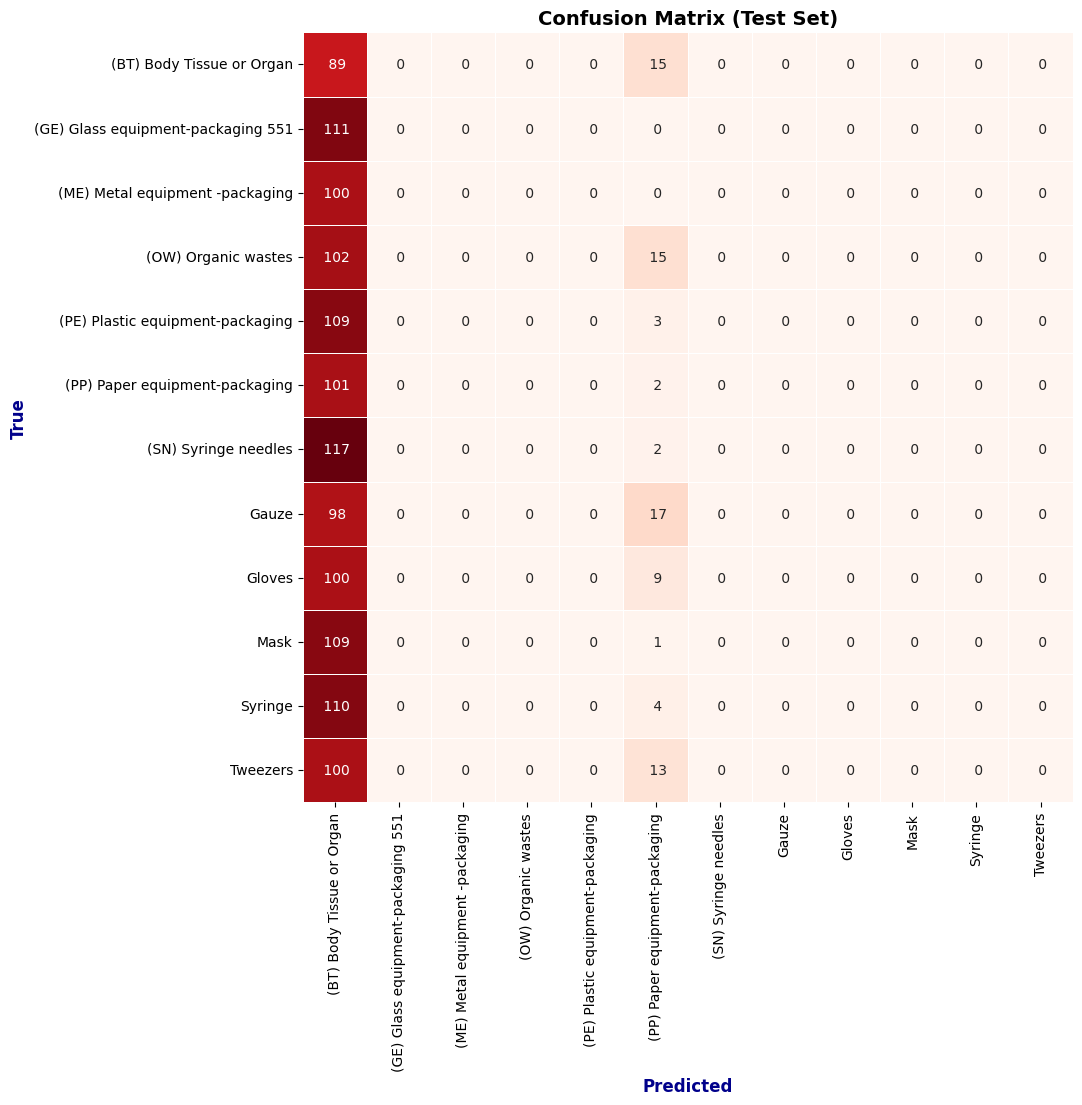

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
cf_mx_test = confusion_matrix(
    test_df['Label'].map(label2id),  # True labels mapped to IDs
    y_pred_test.numpy()              # Predicted labels
)

# Plot
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(
    cf_mx_test,
    cmap='Reds',
    fmt=' ',
    annot=True,
    cbar=False,
    square=True,
    linewidths=0.4,
    xticklabels=CLASSES,
    yticklabels=CLASSES,
    ax=ax
)

# Labels and title
ax.set_ylabel("True", color="darkblue", fontsize=12, fontweight="bold")
ax.set_xlabel("Predicted", color="darkblue", fontsize=12, fontweight="bold")
ax.set_title("Confusion Matrix (Test Set)", fontsize=14, fontweight="bold", color="black")

plt.show()


In [ ]:
from pathlib import Path
import pandas as pd
import numpy as np

ROOT = Path(".")  # you're already inside HOSPITAL_WASTE
exts = {".jpg",".jpeg",".png",".bmp",".webp"}

def build_df(split_folder_name: str):
    rows = []
    for cls_dir in ROOT.rglob(split_folder_name):
        label = cls_dir.parent.name
        for p in cls_dir.rglob("*"):
            if p.suffix.lower() in exts:
                rows.append((str(p), label))
    return pd.DataFrame(rows, columns=["Image", "Label"])

# Build from your structure: <class>/Train images and <class>/Test images
train_all_df = build_df("Train images")
test_df      = build_df("Test images")
print("Train images:", len(train_all_df), " Test images:", len(test_df))
print(train_all_df.head())


Train images: 5259  Test images: 1327
                                               Image  \
0  Pharmaceutical and Biomedical Waste (PBW)\(BT)...   
1  Pharmaceutical and Biomedical Waste (PBW)\(BT)...   
2  Pharmaceutical and Biomedical Waste (PBW)\(BT)...   
3  Pharmaceutical and Biomedical Waste (PBW)\(BT)...   
4  Pharmaceutical and Biomedical Waste (PBW)\(BT)...   

                       Label  
0  (BT) Body Tissue or Organ  
1  (BT) Body Tissue or Organ  
2  (BT) Body Tissue or Organ  
3  (BT) Body Tissue or Organ  
4  (BT) Body Tissue or Organ  


In [ ]:
CLASSES = sorted(train_all_df["Label"].unique().tolist())
label2id = {c:i for i,c in enumerate(CLASSES)}
id2label = {i:c for c,i in label2id.items()}
NUM_CLASSES = len(CLASSES)

# encode once for convenience
train_all_df["y"] = train_all_df["Label"].map(label2id)
test_df["y"] = test_df["Label"].map(label2id)


In [ ]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(
    train_all_df, test_size=0.15, random_state=42, stratify=train_all_df["y"]
)
print("Train:", len(train_df), " Val:", len(val_df))


Train: 4470  Val: 789


In [ ]:
import torch
from torchvision import transforms

mean=[0.485,0.456,0.406]; std=[0.229,0.224,0.225]

train_tf = transforms.Compose([
    transforms.Resize((256,256)),
    transforms.RandomResizedCrop(224, scale=(0.7,1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(0.2,0.2,0.2,0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean,std)
])
eval_tf = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean,std)
])


In [ ]:
from torch.utils.data import DataLoader

# ensure columns are exactly what your CustomImageDataset expects
for df in (train_df,val_df,test_df):
    df.reset_index(drop=True, inplace=True)

BATCH_SIZE=32
NUM_WORKERS=2

train_ds = CustomImageDataset(train_df, label2id, train_tf)
val_ds   = CustomImageDataset(val_df,   label2id, eval_tf)
test_ds  = CustomImageDataset(test_df,  label2id, eval_tf)

train_dl = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True,  num_workers=NUM_WORKERS)
val_dl   = DataLoader(val_ds,   batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)
test_dl  = DataLoader(test_ds,  batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)


In [ ]:
from sklearn.utils.class_weight import compute_class_weight

y_ids = train_df["y"].to_numpy()
classes = np.arange(NUM_CLASSES)
cls_w = compute_class_weight(class_weight="balanced", classes=classes, y=y_ids)
class_weights = torch.tensor(cls_w, dtype=torch.float32)
print("Class weights:", class_weights)


Class weights: tensor([1.0673, 0.9960, 1.0956, 0.9359, 0.9828, 1.0704, 0.9198, 0.9701, 1.0095,
        1.0463, 0.9625, 0.9777])


In [ ]:
import torch.nn as nn
from torchvision.models import resnet34, ResNet34_Weights

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = resnet34(weights=ResNet34_Weights.IMAGENET1K_V1)
model.fc = nn.Linear(512, NUM_CLASSES)
model = model.to(DEVICE)

criterion = nn.CrossEntropyLoss(weight=class_weights.to(DEVICE))
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4, weight_decay=1e-4)

# remove verbose=
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode="min", factor=0.5, patience=2
)


In [ ]:
from tqdm.auto import tqdm

class EarlyStopping:
    def __init__(self, patience=5, min_delta=0.0, path="best_model_resnet34.pth"):
        self.patience=patience; self.min_delta=min_delta
        self.best=float("inf"); self.count=0; self.path=path
    def step(self, val_loss, model):
        if val_loss < self.best - self.min_delta:
            self.best = val_loss; self.count = 0
            torch.save(model.state_dict(), self.path)
            return False
        else:
            self.count += 1
            return self.count >= self.patience

scaler = torch.cuda.amp.GradScaler(enabled=(DEVICE.type=="cuda"))
es = EarlyStopping(patience=5, path="best_model_resnet34.pth")

def accuracy(logits, y):
    return (logits.argmax(1)==y).float().mean().item()

EPOCHS=15
for epoch in range(1,EPOCHS+1):
    model.train()
    tr_loss=0.0; tr_acc=0.0
    for X,y in tqdm(train_dl, desc=f"Train {epoch}/{EPOCHS}"):
        X=X.to(DEVICE); y=y.to(DEVICE)
        optimizer.zero_grad(set_to_none=True)
        with torch.cuda.amp.autocast(enabled=(DEVICE.type=="cuda")):
            logits = model(X)
            loss = criterion(logits,y)
        scaler.scale(loss).backward()
        scaler.step(optimizer); scaler.update()
        tr_loss += loss.item()*X.size(0)
        tr_acc  += accuracy(logits,y)*X.size(0)
    tr_loss/=len(train_ds); tr_acc/=len(train_ds)

    model.eval()
    va_loss=0.0; va_acc=0.0
    with torch.no_grad():
        for X,y in val_dl:
            X=X.to(DEVICE); y=y.to(DEVICE)
            logits = model(X)
            loss = criterion(logits,y)
            va_loss += loss.item()*X.size(0)
            va_acc  += accuracy(logits,y)*X.size(0)
    va_loss/=len(val_ds); va_acc/=len(val_ds)
    scheduler.step(va_loss)

    print(f"Epoch {epoch}: train_loss={tr_loss:.4f} acc={tr_acc:.4f} | val_loss={va_loss:.4f} acc={va_acc:.4f}")

    if es.step(va_loss, model):
        print("Early stopping.")
        break

# Load best weights
model.load_state_dict(torch.load("best_model_resnet34.pth", map_location=DEVICE))
model.eval()


In [ ]:
import torch
from tqdm.auto import tqdm
from sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix
import numpy as np

def predict(model, dl):
    preds=[]
    with torch.inference_mode():
        for X,_ in tqdm(dl, desc="Predicting"):
            X=X.to(DEVICE)
            preds.append(model(X).softmax(1).argmax(1).cpu())
    return torch.cat(preds)

y_pred_test = predict(model, test_dl)
y_true_ids  = test_df["y"].to_numpy()

print("Balanced Acc (test):", balanced_accuracy_score(y_true_ids, y_pred_test.numpy()))
print(classification_report(y_true_ids, y_pred_test.numpy(),
                            target_names=[id2label[i] for i in range(NUM_CLASSES)], digits=4))

# Confusion matrix plot (optional)
import seaborn as sns, matplotlib.pyplot as plt
cm = confusion_matrix(y_true_ids, y_pred_test.numpy())
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', square=True,
            xticklabels=[id2label[i] for i in range(NUM_CLASSES)],
            yticklabels=[id2label[i] for i in range(NUM_CLASSES)], ax=ax)
ax.set_ylabel("True"); ax.set_xlabel("Predicted"); ax.set_title("Confusion Matrix (Test)")
plt.tight_layout(); plt.show()


NameError: name 'model' is not defined

In [32]:
def _preprocess_pil(pil_img):
    return eval_tf(pil_img).unsqueeze(0).to(DEVICE)

def _softmax_logits(model, x):
    with torch.inference_mode():
        logits = model(x)
        return torch.softmax(logits, dim=1)

def classify_frame(model, frame_bgr, topk=3):
    # stronger zoom helps when object is small
    # (we’ll also call zoom_frame(z=2.5) in the loop below)
    h, w = frame_bgr.shape[:2]
    rgb = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)

    # 5-crop strategy: center + four corners (on PIL)
    pil = Image.fromarray(rgb)
    crops = []

    # center crop (70% of shorter side)
    ss = int(0.70 * min(h, w))
    cy, cx = h // 2, w // 2
    y1, y2 = max(0, cy - ss//2), min(h, cy + ss//2)
    x1, x2 = max(0, cx - ss//2), min(w, cx + ss//2)
    crops.append(pil.crop((x1, y1, x2, y2)))

    # corners (60%)
    ss2 = int(0.60 * min(h, w))
    corners = [
        (0, 0), (0, w - ss2), (h - ss2, 0), (h - ss2, w - ss2)
    ]
    for ty, tx in corners:
        crops.append(pil.crop((max(0,tx), max(0,ty), min(w,tx+ss2), min(h,ty+ss2))))

    # stack predictions
    xs = torch.cat([_preprocess_pil(c) for c in crops], dim=0)
    probs = _softmax_logits(model, xs).mean(dim=0)  # average
    topk_probs, topk_idx = torch.topk(probs, k=min(topk, NUM_CLASSES))
    topk_idx = topk_idx.cpu().tolist()
    topk_probs = topk_probs.cpu().tolist()

    # best
    best_idx = topk_idx[0]
    best_conf = topk_probs[0]
    best_label = CLASSES[best_idx]
    # also return lists for overlay
    topk_labels = [CLASSES[i] for i in topk_idx]
    return best_idx, float(best_conf), best_label, list(zip(topk_labels, topk_probs))
